Epoch 1/200
173/173 [==============================] - 2s 4ms/step - loss: 10.5955 - val_loss: 4.8514
Epoch 2/200
173/173 [==============================] - 0s 3ms/step - loss: 2.1642 - val_loss: 0.4484
Epoch 3/200
173/173 [==============================] - 1s 3ms/step - loss: 0.2313 - val_loss: 0.1494
Epoch 4/200
173/173 [==============================] - 0s 3ms/step - loss: 0.1051 - val_loss: 0.0838
Epoch 5/200
173/173 [==============================] - 0s 2ms/step - loss: 0.0625 - val_loss: 0.0557
Epoch 6/200
173/173 [==============================] - 0s 2ms/step - loss: 0.0420 - val_loss: 0.0398
Epoch 7/200
173/173 [==============================] - 0s 2ms/step - loss: 0.0297 - val_loss: 0.0297
Epoch 8/200
173/173 [==============================] - 0s 2ms/step - loss: 0.0217 - val_loss: 0.0222
Epoch 9/200
173/173 [==============================] - 0s 2ms/step - loss: 0.0163 - val_loss: 0.0173
Epoch 10/200
173/173 [==============================] - 0s 2ms/step - loss: 0.0127 - val_l

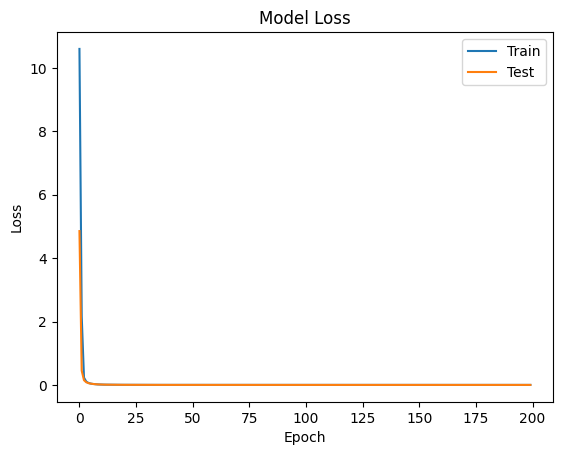

27/27 [==============================] - 0s 1ms/step


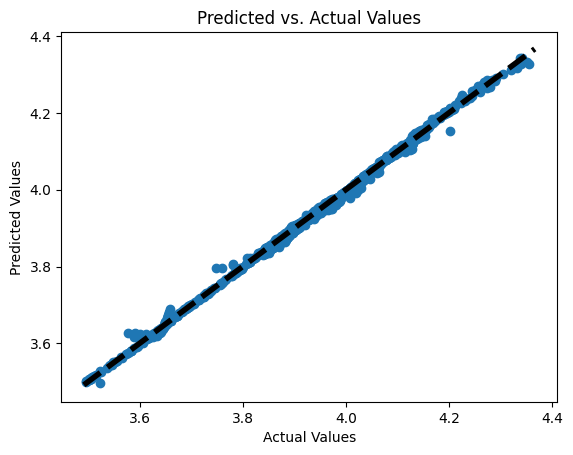

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load data from CSV file
data = pd.read_csv('data_LIB.csv')

# Define input and output variables
X = data.iloc[:, 0:4].values
y = data.iloc[:, 4].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale data to improve performance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
loss = model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=20, validation_data=(X_test, y_test))

# Plot the loss function vs. epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


# Predict using the trained model
y_pred = model.predict(X_test)

# Plot the predicted vs. actual values on a scatter plot
plt.scatter(y_test, y_pred)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Add diagonal line for perfect prediction
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)

plt.show()
